In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [43]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

CEK VALUE YANG KOSONG

In [46]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop('Cabin', axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

UBAH VALUE KOSONG UNTUK KOLOM AGE MENJADI RATA RATA
EMBARKE DENGAN MODUS
DAN MENGHAPUS KOLOM CABIN

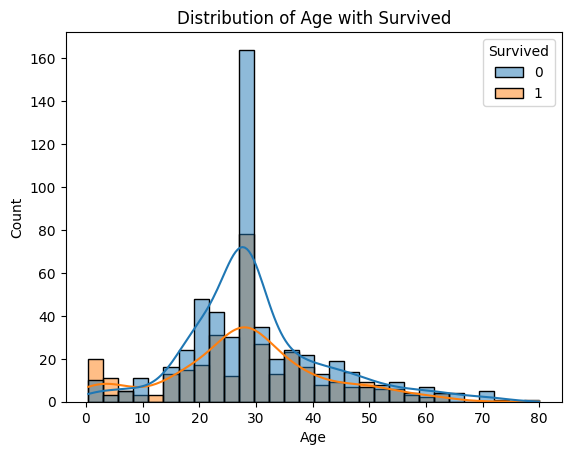

In [47]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Distribution of Age with Survived')
plt.show()

Anak-anak di bawah 10 tahun lebih berpeluang selamat, bisa jadi karena diprioritaskan untuk diselamatkan menggunakan sekoci

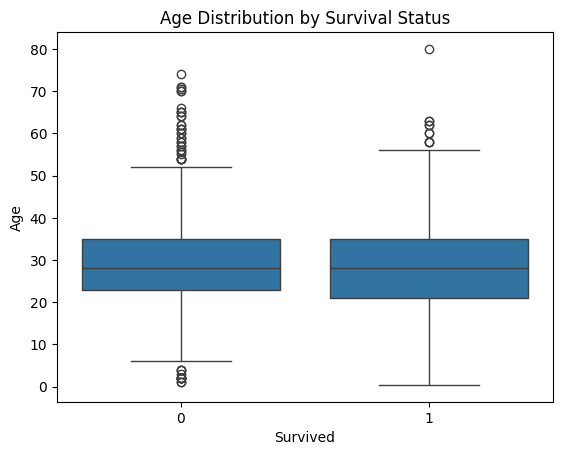

In [48]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()

Area box Survived = 1 (Selamat) lebih rendah dibandingkan yang tidak selamat

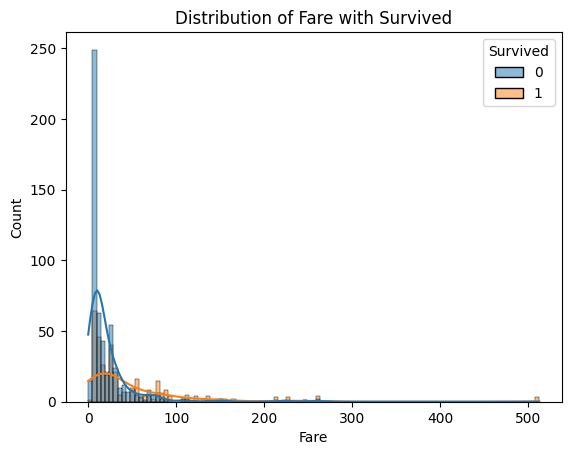

In [49]:
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Distribution of Fare with Survived')
plt.show()

Penumpang dengan biaya yang tinggi lebih berpeluang selamat dibanding yang memiliki biaya rendah

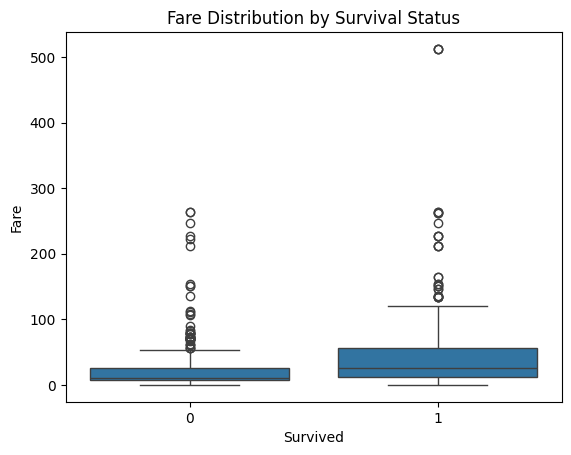

In [50]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival Status')
plt.show()

Area Boxplot yang selamat pada kolom Fare lebih tinggi dibandingkan yang tidak selamat

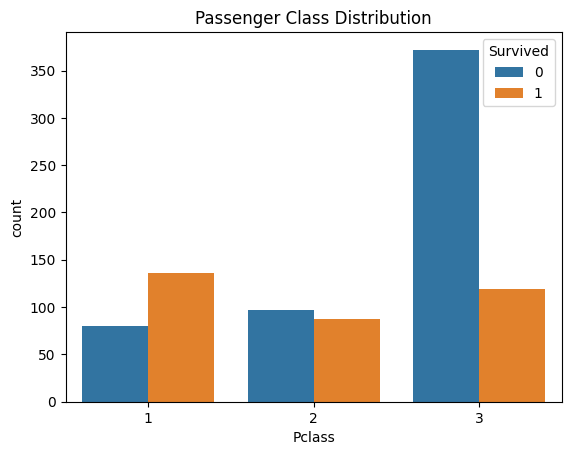

In [51]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Passenger Class Distribution')
plt.show()

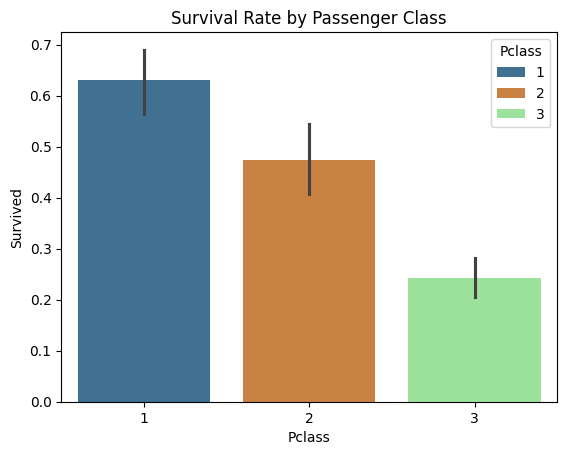

In [52]:
sns.barplot(data=df, x='Pclass', y='Survived', hue='Pclass', palette={1: '#3274a1', 2: '#e1812c', 3:'lightgreen'})
plt.title('Survival Rate by Passenger Class')
plt.show()

Persentase orang yang selamat pada Pclass = 1 lebih besar dibandingkan Pclass 2 dan 3

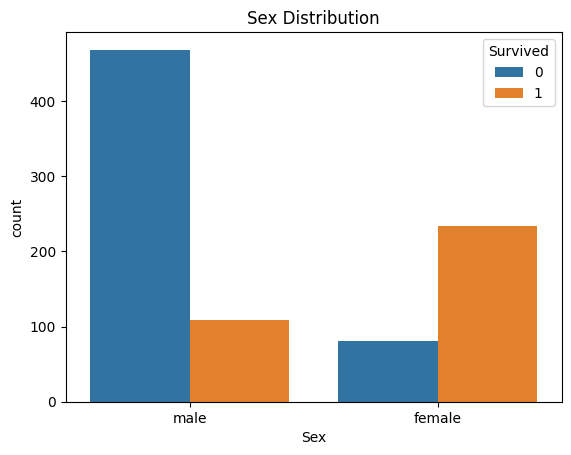

In [53]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sex Distribution')
plt.show()

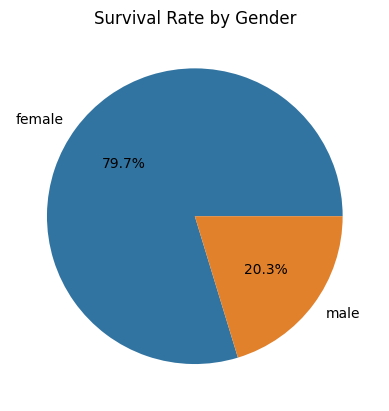

In [54]:
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()
survival_rate_by_gender = survival_rate_by_gender * 100
plt.pie(survival_rate_by_gender, labels=survival_rate_by_gender.index, autopct='%1.1f%%', colors=['#3274a1', '#e1812c'])
plt.title('Survival Rate by Gender')
plt.show()

Persentase orang yang selamat pada Sex = female lebih tinggi dibandingkan male

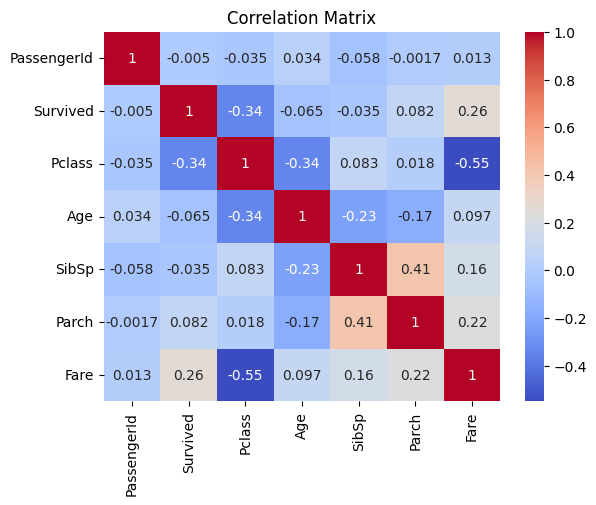

In [55]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Pclass dan Fare memiliki korelasi negativ, semakin rendah Pclass maka semakin tinggi Fare-nya
- Fitur yang paling berpengaruh terhadap Survived adalah Pclass

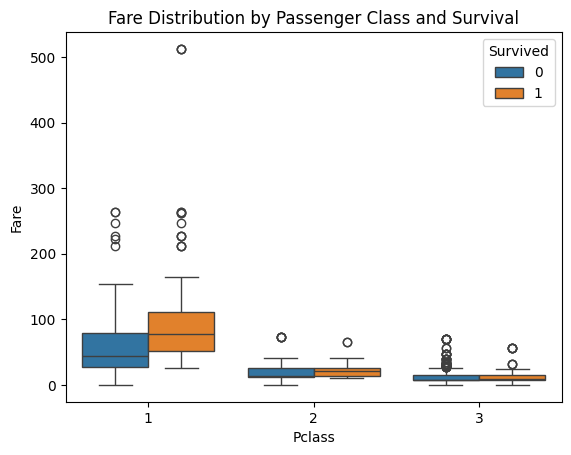

In [56]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare Distribution by Passenger Class and Survival')
plt.show()


Penumpang di kelas pertama (Pclass=1) cenderung membayar tarif yang lebih tinggi dan memiliki kemungkinan lebih besar untuk selamat dibandingkan penumpang di kelas yang lebih rendah (Pclass=2 dan Pclass=3). Penumpang dengan tarif yang lebih rendah, terutama di kelas 3, memiliki tingkat kelangsungan hidup yang lebih rendah.

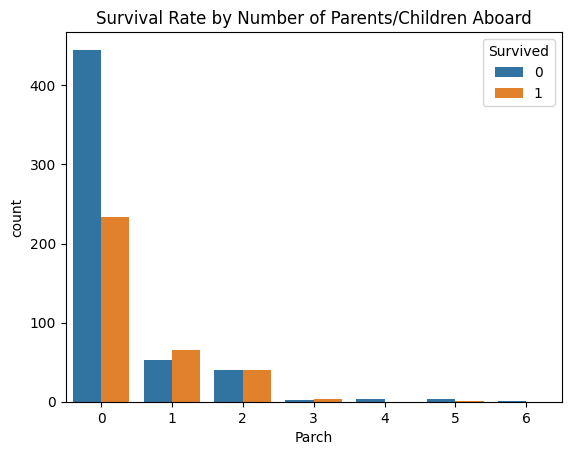

In [57]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()


Penumpang dengan 1-3 orang tua atau anak yang ikut serta memiliki peluang lebih besar untuk selamat dibandingkan penumpang yang bepergian sendiri atau dengan banyak orang tua/anak. Sama seperti SibSp, tingkat kelangsungan hidup menurun dengan bertambahnya jumlah orang tua/anak di atas 3.

C:\Temp\ipykernel_5176\2340798346.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Pclass', y='Age', data=df, palette="muted", jitter=True, alpha=0.5)


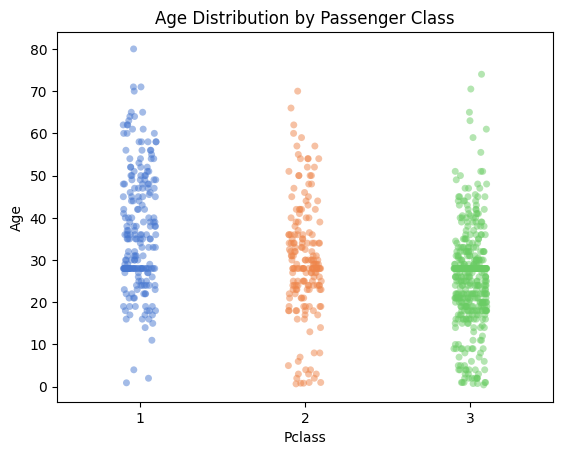

In [58]:
sns.stripplot(x='Pclass', y='Age', data=df, palette="muted", jitter=True, alpha=0.5)
plt.title('Age Distribution by Passenger Class')
plt.show()


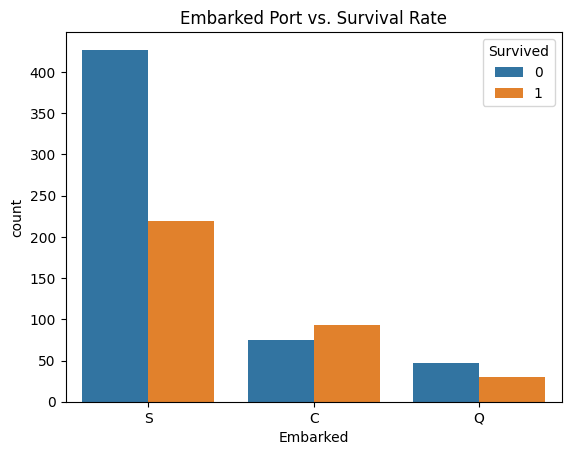

In [59]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked Port vs. Survival Rate')
plt.show()


Penumpang yang naik di Cherbourg (Embarked=C) memiliki tingkat kelangsungan hidup tertinggi, sementara mereka yang naik di Southampton (Embarked=S) memiliki tingkat kelangsungan hidup terendah. Ini mungkin terkait dengan fakta bahwa banyak penumpang dari kelas 1 naik di Cherbourg.

In [60]:
# import pandas as pd

# Load the data from the uploaded CSV files
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of both datasets to understand their structure
train_data_info = train_data.head()
test_data_info = test_data.head()

train_data_info, train_data.describe(), test_data_info, test_data.describe()


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [61]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing embarked values with the most common embarkation port
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Fill missing fare values in test set with the median fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Drop columns that won't be used in the model
train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Encode categorical variables (Sex and Embarked)
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])

train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
test_data['Embarked'] = le.transform(test_data['Embarked'])

# Split the data into features and target
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

# Predict on the test data
test_predictions = model.predict(test_data)

validation_accuracy, classification_report_val, test_predictions[:10]  # Display the accuracy, report, and first 10 predictions

(0.8212290502793296,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.85       105\n           1       0.81      0.74      0.77        74\n\n    accuracy                           0.82       179\n   macro avg       0.82      0.81      0.81       179\nweighted avg       0.82      0.82      0.82       179\n',
 array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64))

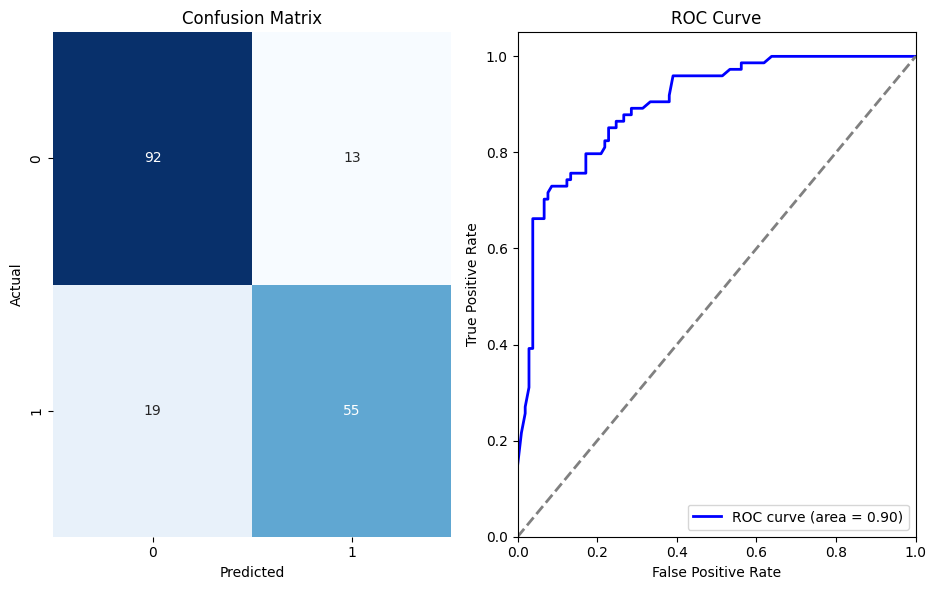

In [65]:
cm = confusion_matrix(y_val, y_val_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(14, 6))

# Plot 1: Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 2: ROC Curve
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan bahwa faktor-faktor seperti kelas penumpang, tarif yang dibayar, jumlah keluarga yang ikut, dan pelabuhan embarkasi memiliki dampak signifikan terhadap kelangsungan hidup penumpang Titanic. Penumpang di kelas yang lebih tinggi, dengan tarif lebih tinggi, dan dengan jumlah keluarga yang moderat cenderung memiliki peluang lebih besar untuk selamat. Selain itu, pelabuhan embarkasi juga memainkan peran penting, dengan penumpang dari Cherbourg memiliki peluang kelangsungan hidup yang lebih tinggi.

Model RandomForestClassifier memberikan hasil yang baik dengan akurasi yang cukup tinggi. Namun, model ini sedikit lebih bias terhadap penumpang yang tidak selamat, seperti yang terlihat dari nilai recall yang lebih rendah untuk kelas 1. Untuk meningkatkan model, bisa dilakukan hyperparameter tuning atau mencoba model lain seperti Gradient Boosting atau XGBoost.